In [1]:
# Python Libraries
import numpy as np
import matplotlib.pyplot as plt

import scipy

from qiskit import *
from qiskit.quantum_info import Pauli
from qiskit.circuit import Parameter
from scipy import linalg

from qiskit import execute, Aer, IBMQ
from qiskit.providers.ibmq import IBMQFactory,least_busy
from qiskit.tools.monitor import job_monitor

print('Import successfull')

Import successfull


The system we will study is the Heisenberg spin chain of length 3 with a magnetic field in the $z$-direction. First, we will classically simulate the system and then compute the component of the spin vector of the central spin in the chain.

(1) Define the parameters of the system. Define the spin coupling strength $J$, magnetic field strength $B$, time range and number of Trotter steps. Define the Pauli operators from the Pauli module.

(2) Define the Heisenberg Hamiltonian, $H$ = $J\sum\limits_{i<j}\vec{S}_i\cdot\vec{S}_j$ + $B\sum\limits_{k=1}^3S_z$. The spin operators are defined as $\vec{S}_i = I\otimes\dots\otimes\vec{S}\otimes\dots\otimes I$, with $\vec{S}$ = $\frac{1}{2}\vec{\sigma}$, $\vec{\sigma}$ = $(X, Y, Z)$.

(3) Decompose the Hamiltonian by spin pairs and keep the magnetic field term separate, i.e. define Hamiltonian terms $H_{01}, H_{12}$ and $H_B$.

(4) Define some initial state $|\psi_0\rangle$. Any state that is normalised is valid. To observe any meaningful time evolution define a state not aligned in the $z$-direction.

(5) Define the operators for the spin vector components of the central spin. Define $S_{1i}$, $i=x,y,z$.

(6) Define the total time evolution operator $e^{-iHt}$ and Trotterized time evolution operators $e^{-\frac{iH_{01}t}{N_{Tr}}},e^{-\frac{iH_{12}t}{N_{Tr}}}$ and a time evolution operator $e^{-iH_Bt}$(to be applied outside of the Trotterization). **Note**: In Python $i$ is defined as $j$.

(7) Time evolve the initial quantum state exactly, using $e^{-iHt}$, and also using the Trotter decomposition. **Hint**: Use a for loop over the time array, within the loop evolve $|\psi(0)\rangle$ to $|\psi(t[j])\rangle$ and compute $\langle\psi(t[j])|\vec{S}|\psi(t[j])\rangle$. Store the results in arrays for each spin vector component. Plot the evolution of each vector component.

**Useful Commands**: scipy.linalg.expm(), np.dot(,), np.conj(), np.linalg.matrix_power(,), np.real()

In [2]:
J = 0.8
B = 1
Ntime = 100 
Ntr = 5

I = Pauli('I').to_matrix()
X = Pauli('X').to_matrix()
Y = Pauli('Y').to_matrix()
Z = Pauli('Z').to_matrix()

H01 = (J/4)*(np.kron(np.kron(X,X),I) + np.kron(np.kron(Y,Y),I) + np.kron(np.kron(Z,Z),I))
H12 = (J/4)*(np.kron(np.kron(I,X),X) + np.kron(np.kron(I,Y),Y) + np.kron(np.kron(I,Z),Z))
Hmag = (B/2)*(np.kron(np.kron(Z,I),I) + np.kron(np.kron(I,Z),I) + np.kron(np.kron(I,I),Z))
Ham = H01 + H12 + Hmag

psi0 = np.array([1/np.sqrt(2),0,1/np.sqrt(2),0,0,0,0,0])

time = np.linspace(0,4*np.pi,Ntime)

Sx_cent = (np.kron(np.kron(I,X),I))/2
Sy_cent = (np.kron(np.kron(I,Y),I))/2
Sz_cent = (np.kron(np.kron(I,Z),I))/2

Sxt_cent = []
Sxt_cent_Tr = []
Syt_cent = []
Syt_cent_Tr = []
Szt_cent = []
Szt_cent_Tr = []

for it in range(Ntime):
    
    psi = np.dot(scipy.linalg.expm(-Ham*time[it]*1j),psi0)
    Sxt_cent.append(np.real(np.dot(np.conj(psi),np.dot(Sx_cent,psi))))
    Syt_cent.append(np.real(np.dot(np.conj(psi),np.dot(Sy_cent,psi))))
    Szt_cent.append(np.real(np.dot(np.conj(psi),np.dot(Sz_cent,psi))))
    
    exp1 = scipy.linalg.expm(-H01*time[it]*1j/Ntr)
    exp2 = scipy.linalg.expm(-H12*time[it]*1j/Ntr)
    exp_mag = scipy.linalg.expm(-Hmag*time[it]*1j)
    
    psi_mag = np.dot(exp_mag,psi0)
    psi_Tr = np.dot(np.linalg.matrix_power(np.dot(exp1,exp2),Ntr),psi_mag)
    Sxt_cent_Tr.append(np.real(np.dot(np.conj(psi_Tr),np.dot(Sx_cent,psi_Tr))))
    Syt_cent_Tr.append(np.real(np.dot(np.conj(psi_Tr),np.dot(Sy_cent,psi_Tr))))
    Szt_cent_Tr.append(np.real(np.dot(np.conj(psi_Tr),np.dot(Sz_cent,psi_Tr))))

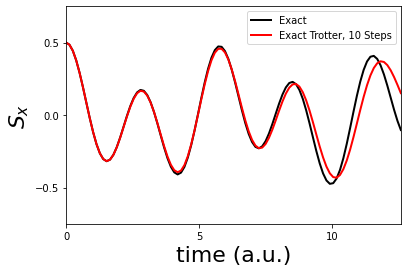

In [3]:
fig, ax = plt.subplots()

plt.plot(time, Sxt_cent, linewidth=2.0, color = 'k', label = 'Exact')
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels      
plt.xlabel("time (a.u.)",size=22)
plt.ylabel("$S_x$",size=22)

plt.ylim([-0.75,0.75])
plt.xlim([0,4*np.pi])

plt.plot(time, Sxt_cent_Tr, linewidth=2.0, color = 'r', label = 'Exact Trotter, 5 Steps')
plt.legend(loc='upper right')

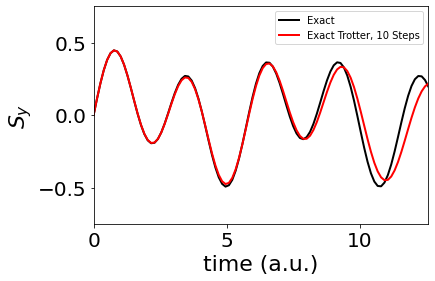

In [4]:
fig, ax = plt.subplots()

plt.plot(time, Syt_cent, linewidth=2.0, color = 'k', label = 'Exact')
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels      
plt.xlabel("time (a.u.)",size=22)
plt.ylabel("$S_y$",size=22)

plt.ylim([-0.75,0.75])
plt.xlim([0,4*np.pi])

plt.plot(time, Syt_cent_Tr, linewidth=2.0, color = 'r', label = 'Exact Trotter, 10 Steps')
plt.legend(loc='upper right')

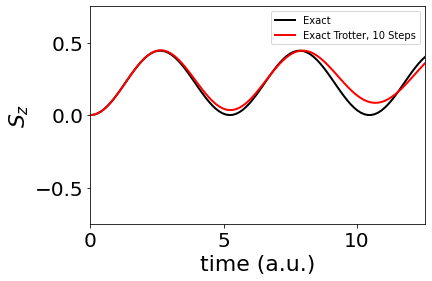

In [5]:
fig, ax = plt.subplots()

plt.plot(time, Szt_cent, linewidth=2.0, color = 'k', label = 'Exact')
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels      
plt.xlabel("time (a.u.)",size=22)
plt.ylabel("$S_z$",size=22)

plt.ylim([-0.75,0.75])
plt.xlim([0,4*np.pi])

plt.plot(time, Szt_cent_Tr, linewidth=2.0, color = 'r', label = 'Exact Trotter, 10 Steps')
plt.legend(loc='upper right')

Define a parameterised quantum circuit which simulates the Heisenberg interaction. Convert this circuit into an instruction to use in the total circuit.
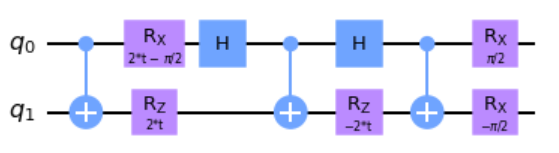

In [6]:
t = Parameter('t')
Heisenberg_circuit = QuantumCircuit(2, name='Heisenberg')

Heisenberg_circuit.cx(0,1)
Heisenberg_circuit.rx(2*t-np.pi/2,0)
Heisenberg_circuit.rz(2*t,1)
Heisenberg_circuit.h(0)
Heisenberg_circuit.cx(0,1)
Heisenberg_circuit.h(0)
Heisenberg_circuit.rz(-2*t,1)
Heisenberg_circuit.cx(0,1)
Heisenberg_circuit.rx(np.pi/2,0)
Heisenberg_circuit.rx(-np.pi/2,1)

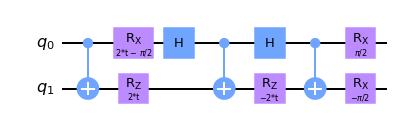

In [7]:
Heisenberg_circuit.draw('mpl')

In [8]:
Heisenberg = Heisenberg_circuit.to_instruction()

Now, the aim is to recreate your classical Trotter results using quantum circuits.

(1) Define a new set of time points over the same range as before, but with less points.

(2) In a similar way to how you previously simulated the time evolution, define a for loop over the time points and store the final results in an array.

(3) For every time point create a quantum circuit with 3 qubits and 3 classical bits, initialise the central qubit in your chosen state and simulate the magnetic field time evolution on the 3 qubits. Then, in a new loop over the Trotter steps, simulate the Heisenberg interaction between the qubit pairs and measure at the end of the circuit.

- When constructing the quantum circuit define the circuit parameter to be $t$ = $\frac{J}{4}\frac{t[j]}{N_{Tr}}$.
- After using counts = results.get_counts(), enter the following code
  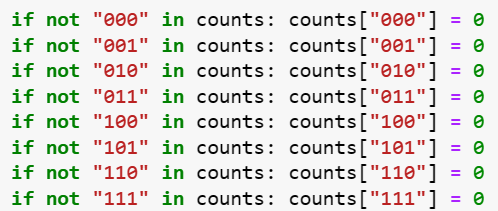
- Explicitly compute $\langle\psi|\vec{S}|\psi\rangle$ in terms of the components of the statevectors and use this equation to compute the vector component. For some meausurement outcome, e.g. 010, the equation will contain counts[010]/Nshots.

In [9]:
time_sim = np.linspace(0, 4*np.pi, 20)

backend = Aer.get_backend('qasm_simulator')
Nshots = 8000

Sz_sim_cent = []

for it in range(len(time_sim)):
    
    qc = QuantumCircuit(3,3)
    
    qc.h(1)
    
    qc.rz(B*time_sim[it],0)
    qc.rz(B*time_sim[it],1)
    qc.rz(B*time_sim[it],2)
        
    for itr in range(Ntr):
        
        qc.append(Heisenberg, [0,1])
        qc.append(Heisenberg, [1,2])
        
    qc.measure(range(3),range(3))
    
    t_value = (J/4)*time_sim[it]/Ntr
    qc = qc.bind_parameters([t_value])
    
    results = execute(qc, backend, shots=Nshots).result()
    counts = results.get_counts()
    
    if not "000" in counts: counts["000"] = 0
    if not "001" in counts: counts["001"] = 0
    if not "010" in counts: counts["010"] = 0
    if not "011" in counts: counts["011"] = 0
    if not "100" in counts: counts["100"] = 0
    if not "101" in counts: counts["101"] = 0
    if not "110" in counts: counts["110"] = 0
    if not "111" in counts: counts["111"] = 0
        
    Sz_sim_cent.append(float(1/2)*((counts['000'])+(counts['001'])-(counts['010'])-(counts['011'])+(counts['100'])+(counts['101'])-(counts['110'])-(counts['111']))/Nshots)

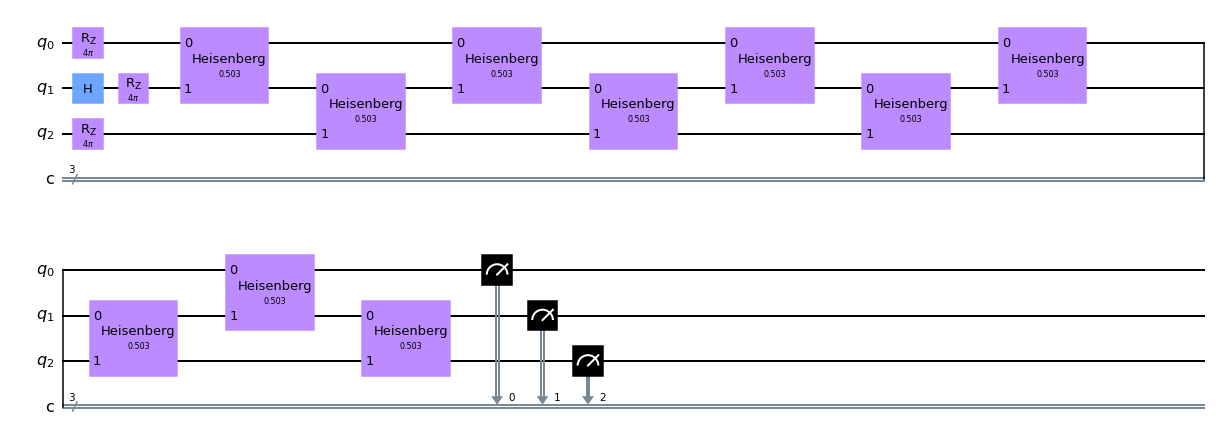

In [10]:
qc.draw('mpl')

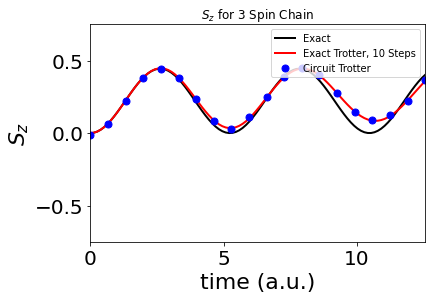

In [11]:
fig, ax = plt.subplots()

plt.title('$S_z$ for 3 Spin Chain')
plt.plot(time, Szt_cent, linewidth=2.0, color = 'k', label = 'Exact')
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels      
plt.xlabel("time (a.u.)",size=22)
plt.ylabel("$S_z$",size=22)

plt.ylim([-0.75,0.75])
plt.xlim([0,4*np.pi])

plt.plot(time, Szt_cent_Tr, linewidth=2.0, color = 'r', label = 'Exact Trotter, 10 Steps')

plt.plot(time_sim, Sz_sim_cent, color='b', lw=0, marker='o', markersize=7, label = 'Circuit Trotter')
plt.legend(loc='upper right')

In [12]:
time_sim = np.linspace(0, 4*np.pi, 20)

backend = Aer.get_backend('qasm_simulator')
Nshots = 8000

Sx_sim_cent = []

for it in range(len(time_sim)):
    
    qc = QuantumCircuit(3,3)
    
    qc.h(1)
    
    qc.rz(B*time_sim[it],0)
    qc.rz(B*time_sim[it],1)
    qc.rz(B*time_sim[it],2)
        
    for itr in range(Ntr):
        
        qc.append(Heisenberg, [0,1])
        qc.append(Heisenberg, [1,2])
       
    qc.h(1)
    qc.measure(range(3),range(3))
    
    t_value = (J/4)*time_sim[it]/Ntr
    qc = qc.bind_parameters([t_value])
    
    results = execute(qc, backend, shots=Nshots).result()
    counts = results.get_counts()
    
    if not "000" in counts: counts["000"] = 0
    if not "001" in counts: counts["001"] = 0
    if not "010" in counts: counts["010"] = 0
    if not "011" in counts: counts["011"] = 0
    if not "100" in counts: counts["100"] = 0
    if not "101" in counts: counts["101"] = 0
    if not "110" in counts: counts["110"] = 0
    if not "111" in counts: counts["111"] = 0
        
    Sx_sim_cent.append(float(1/2)*((counts['000'])+(counts['001'])-(counts['010'])-(counts['011'])+(counts['100'])+(counts['101'])-(counts['110'])-(counts['111']))/Nshots)

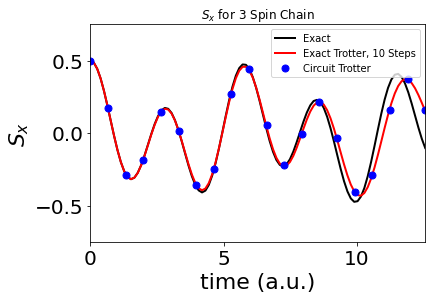

In [13]:
fig, ax = plt.subplots()

plt.title('$S_x$ for 3 Spin Chain')
plt.plot(time, Sxt_cent, linewidth=2.0, color = 'k', label = 'Exact')
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels      
plt.xlabel("time (a.u.)",size=22)
plt.ylabel("$S_x$",size=22)

plt.ylim([-0.75,0.75])
plt.xlim([0,4*np.pi])

plt.plot(time, Sxt_cent_Tr, linewidth=2.0, color = 'r', label = 'Exact Trotter, 10 Steps')

plt.plot(time_sim, Sx_sim_cent, color='b', lw=0, marker='o', markersize=7, label = 'Circuit Trotter')
plt.legend(loc='upper right')

In [14]:
time_sim = np.linspace(0, 4*np.pi, 20)

backend = Aer.get_backend('qasm_simulator')
Nshots = 8000

Sy_sim_cent = []

for it in range(len(time_sim)):
    
    qc = QuantumCircuit(3,3)
    
    qc.h(1)
    
    qc.rz(B*time_sim[it],0)
    qc.rz(B*time_sim[it],1)
    qc.rz(B*time_sim[it],2)
        
    for itr in range(Ntr):
        
        qc.append(Heisenberg, [0,1])
        qc.append(Heisenberg, [1,2])
       
    qc.sdg(1)
    qc.h(1)
    qc.measure(range(3),range(3))
    
    t_value = (J/4)*time_sim[it]/Ntr
    qc = qc.bind_parameters([t_value])
    
    results = execute(qc, backend, shots=Nshots).result()
    counts = results.get_counts()
    
    if not "000" in counts: counts["000"] = 0
    if not "001" in counts: counts["001"] = 0
    if not "010" in counts: counts["010"] = 0
    if not "011" in counts: counts["011"] = 0
    if not "100" in counts: counts["100"] = 0
    if not "101" in counts: counts["101"] = 0
    if not "110" in counts: counts["110"] = 0
    if not "111" in counts: counts["111"] = 0
        
    Sy_sim_cent.append(float(1/2)*((counts['000'])+(counts['001'])-(counts['010'])-(counts['011'])+(counts['100'])+(counts['101'])-(counts['110'])-(counts['111']))/Nshots)

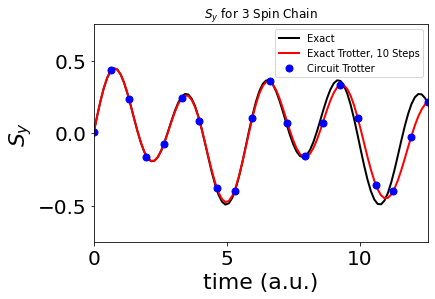

In [15]:
fig, ax = plt.subplots()

plt.title('$S_y$ for 3 Spin Chain')
plt.plot(time, Syt_cent, linewidth=2.0, color = 'k', label = 'Exact')
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels      
plt.xlabel("time (a.u.)",size=22)
plt.ylabel("$S_y$",size=22)

plt.ylim([-0.75,0.75])
plt.xlim([0,4*np.pi])

plt.plot(time, Syt_cent_Tr, linewidth=2.0, color = 'r', label = 'Exact Trotter, 10 Steps')

plt.plot(time_sim, Sy_sim_cent, color='b', lw=0, marker='o', markersize=7, label = 'Circuit Trotter')
plt.legend(loc='upper right')

The results you previously computed were obtained from your classical device simulating your quantum process. What does the process look like if you were to simulate this problem on a real quantum processor.

To do this, load your IBM quantum account by entering the following code with your API Token, which is found here

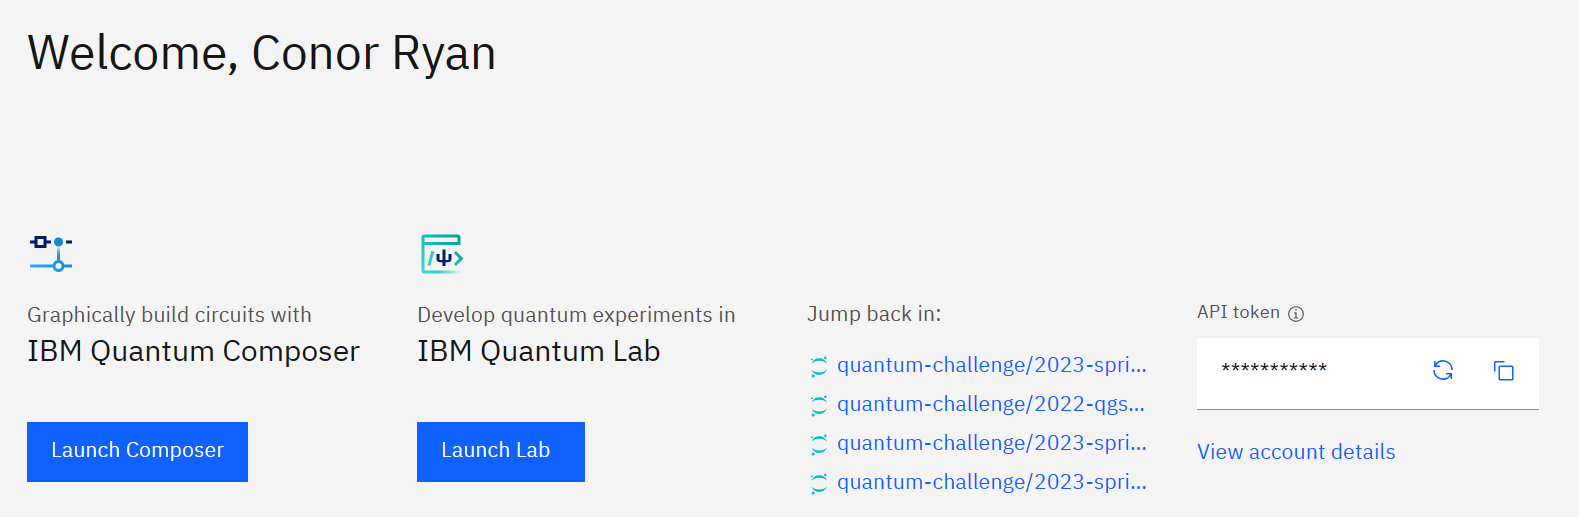

In [16]:
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider.save_account('API Token')

To run the simulation on a quantum computer you can use the same code as before with some minor changes.

Firstly, select which IBM quantum processor you want to run the job on. On the IBM Quantum Experience page find which devices your account has access to and check which one has the shortest queue(least number of jobs waiting to run).

Enter the device name as a string in the backend command, instead of 'qasm_simulator'.

The only other change required is in your variable names to distinguish them from your classically obtained data. This is not essential to run a job on a quantum computer, just a matter of convience to have different arrays for different results.

In [ ]:
from qiskit.tools.monitor import job_monitor
HW = 'ibmq_manila'

bk_real = provider.get_backend(HW)

Sz_sim_cent_real = []

for it in range(len(time_sim)):
    
    qc_real = QuantumCircuit(3,3)
    
    qc_real.h(1)
    
    qc_real.rz(B*time_sim[it],0)
    qc_real.rz(B*time_sim[it],1)
    qc_real.rz(B*time_sim[it],2)
        
    for itr in range(Ntr):
        
        qc_real.append(Heisenberg, [0,1])
        qc_real.append(Heisenberg, [1,2])
        
    qc_real.measure(range(3),range(3))
    
    t_value = (J/4)*time_sim[it]/Ntr
    qc_real = qc_real.bind_parameters([t_value])
    
    job_real = execute(qc_real, shots=8000, backend=bk_real)
    job_monitor(job_real)
    
    results_real = job_real.result()
    counts_real = results_real.get_counts()
    
    if not "000" in counts_real: counts_real["000"] = 0
    if not "001" in counts_real: counts_real["001"] = 0
    if not "010" in counts_real: counts_real["010"] = 0
    if not "011" in counts_real: counts_real["011"] = 0
    if not "100" in counts_real: counts_real["100"] = 0
    if not "101" in counts_real: counts_real["101"] = 0
    if not "110" in counts_real: counts_real["110"] = 0
    if not "111" in counts_real: counts_real["111"] = 0
        
    Sz_sim_cent_real.append(float(1/2)*((counts_real['000'])+(counts_real['001'])-(counts_real['010'])-(counts_real['011'])+(counts_real['100'])+(counts_real['101'])-(counts_real['110'])-(counts_real['111']))/Nshots)

Job Status: job is queued (None)

In [ ]:
fig, ax = plt.subplots()

plt.title('$S_z$ for 3 Spin Chain')
plt.plot(time, Szt_cent, linewidth=2.0, color = 'k', label = 'Exact')
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels      
plt.xlabel("time (a.u.)",size=22)
plt.ylabel("$S_z$",size=22)

plt.ylim([-0.75,0.75])
plt.xlim([0,4*np.pi])

plt.plot(time, Szt_cent_Tr, linewidth=2.0, color = 'r', label = 'Exact Trotter, 10 Steps')

plt.plot(time_sim, Sz_sim_cent, color='b', lw=0, marker='o', markersize=7, label = 'Circuit Trotter')
plt.plot(time_sim, Sz_sim_cent_real, color='g', lw=0, marker='o', markersize=7, label = 'Hardware Trotter')
plt.legend(loc='upper right')

In [ ]:
from qiskit.tools.monitor import job_monitor
HW = 'ibmq_manila'

bk_real = provider.get_backend(HW)

Sx_sim_cent_real = []

for it in range(len(time_sim)):
    
    qc_real = QuantumCircuit(3,3)
    
    qc_real.h(1)
    
    qc_real.rz(B*time_sim[it],0)
    qc_real.rz(B*time_sim[it],1)
    qc_real.rz(B*time_sim[it],2)
        
    for itr in range(Ntr):
        
        qc_real.append(Heisenberg, [0,1])
        qc_real.append(Heisenberg, [1,2])
       
    qc_real.h(1)
    qc_real.measure(range(3),range(3))
    
    t_value = (J/4)*time_sim[it]/Ntr
    qc_real = qc_real.bind_parameters([t_value])
    
    job_real = execute(qc_real, shots=8000, backend=bk_real)
    job_monitor(job_real)
    
    results_real = job_real.result()
    counts_real = results_real.get_counts()
    
    if not "000" in counts_real: counts_real["000"] = 0
    if not "001" in counts_real: counts_real["001"] = 0
    if not "010" in counts_real: counts_real["010"] = 0
    if not "011" in counts_real: counts_real["011"] = 0
    if not "100" in counts_real: counts_real["100"] = 0
    if not "101" in counts_real: counts_real["101"] = 0
    if not "110" in counts_real: counts_real["110"] = 0
    if not "111" in counts_real: counts_real["111"] = 0
        
    Sx_sim_cent_real.append(float(1/2)*((counts_real['000'])+(counts_real['001'])-(counts_real['010'])-(counts_real['011'])+(counts_real['100'])+(counts_real['101'])-(counts_real['110'])-(counts_real['111']))/Nshots)

In [ ]:
fig, ax = plt.subplots()

plt.title('$S_x$ for 3 Spin Chain')
plt.plot(time, Sxt_cent, linewidth=2.0, color = 'k', label = 'Exact')
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels      
plt.xlabel("time (a.u.)",size=22)
plt.ylabel("$S_x$",size=22)

plt.ylim([-0.75,0.75])
plt.xlim([0,4*np.pi])

plt.plot(time, Sxt_cent_Tr, linewidth=2.0, color = 'r', label = 'Exact Trotter, 10 Steps')

plt.plot(time_sim, Sx_sim_cent, color='b', lw=0, marker='o', markersize=7, label = 'Circuit Trotter')
plt.plot(time_sim, Sx_sim_cent_real, color='g', lw=0, marker='o', markersize=7, label = 'Hardware Trotter')
plt.legend(loc='upper right')

In [ ]:
from qiskit.tools.monitor import job_monitor
HW = 'ibmq_manila'

bk_real = provider.get_backend(HW)

Sy_sim_cent_real = []

for it in range(len(time_sim)):
    
    qc_real = QuantumCircuit(3,3)
    
    qc_real.h(1)
    
    qc_real.rz(B*time_sim[it],0)
    qc_real.rz(B*time_sim[it],1)
    qc_real.rz(B*time_sim[it],2)
        
    for itr in range(Ntr):
        
        qc_real.append(Heisenberg, [0,1])
        qc_real.append(Heisenberg, [1,2])
       
    qc_real.sdg(1)
    qc_real.h(1)
    qc_real.measure(range(3),range(3))
    
    t_value = (J/4)*time_sim[it]/Ntr
    qc_real = qc_real.bind_parameters([t_value])
    
    job_real = execute(qc_real, shots=8000, backend=bk_real)
    job_monitor(job_real)
    
    results_real = job_real.result()
    counts_real = results_real.get_counts()
    
    if not "000" in counts_real: counts_real["000"] = 0
    if not "001" in counts_real: counts_real["001"] = 0
    if not "010" in counts_real: counts_real["010"] = 0
    if not "011" in counts_real: counts_real["011"] = 0
    if not "100" in counts_real: counts_real["100"] = 0
    if not "101" in counts_real: counts_real["101"] = 0
    if not "110" in counts_real: counts_real["110"] = 0
    if not "111" in counts_real: counts_real["111"] = 0
        
    Sy_sim_cent_real.append(float(1/2)*((counts_real['000'])+(counts_real['001'])-(counts_real['010'])-(counts_real['011'])+(counts_real['100'])+(counts_real['101'])-(counts_real['110'])-(counts_real['111']))/Nshots)

In [ ]:
fig, ax = plt.subplots()

plt.title('$S_y$ for 3 Spin Chain')
plt.plot(time, Syt_cent, linewidth=2.0, color = 'k', label = 'Exact')
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels      
plt.xlabel("time (a.u.)",size=22)
plt.ylabel("$S_y$",size=22)

plt.ylim([-0.75,0.75])
plt.xlim([0,4*np.pi])

plt.plot(time, Syt_cent_Tr, linewidth=2.0, color = 'r', label = 'Exact Trotter, 10 Steps')

plt.plot(time_sim, Sy_sim_cent, color='b', lw=0, marker='o', markersize=7, label = 'Circuit Trotter')
plt.plot(time_sim, Sy_sim_cent_real, color='g', lw=0, marker='o', markersize=7, label = 'Hardware Trotter')
plt.legend(loc='upper right')

Instead of queueing for a real quantum computer, you can simulate the effects of noise locally on your classical device.

To do this, import several modules which will allow for simulations involving readout errors, depolarizing errors and thermal relaxation processes.

In a custom noise model you can set the error rates for each of these noisy processes. Take these parameters either from the quantum processor you chose, or use generally accepted realistic error rates.

Qiskit has built in error mitigation for measurement errors. A generic body of code can be constructed for any quantum circuit, which constructs a measurement error correction matrix from your custom noise model.

In [16]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import thermal_relaxation_error
from qiskit.providers.aer import noise
from qiskit.utils.mitigation import complete_meas_cal, CompleteMeasFitter

In [17]:
custom_noise_model = NoiseModel()
custom_noise_model.reset()
error1 = ReadoutError([[1-0.004,0.004],[0.002,1-0.002]])
error2 = depolarizing_error(0.005, 1)
error3 = depolarizing_error(0.01, 2)
error4 = thermal_relaxation_error(87e3, 58e3, 30)
error5 = thermal_relaxation_error(87e3, 58e3, 300).expand(thermal_relaxation_error(87e3, 58e3, 300))
custom_noise_model.add_all_qubit_readout_error(error1)
custom_noise_model.add_all_qubit_quantum_error(error2, ['id', 'rz', 'rx','h'])
custom_noise_model.add_all_qubit_quantum_error(error3, ['cx'])
custom_noise_model.add_all_qubit_quantum_error(error4, ['id', 'rz', 'rx','h'])
custom_noise_model.add_all_qubit_quantum_error(error5, ['cx'])

In [18]:
qr = QuantumRegister(3)
meas_calibs, state_labels = complete_meas_cal(qr=qr, circlabel='mcal')

t_qc = transpile(meas_calibs, backend)
qobj = assemble(t_qc, shots=Nshots)
cal_results = backend.run(qobj, noise_model=custom_noise_model, shots=Nshots).result()

meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
np.round(meas_fitter.cal_matrix,3)

meas_filter = meas_fitter.filter

basis_gates = custom_noise_model.basis_gates

C:\Users\cryan\AppData\Local\Temp\ipykernel_18052\2710227752.py:2: DeprecationWarning: The function ``qiskit.utils.mitigation.circuits.complete_meas_cal()`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  meas_calibs, state_labels = complete_meas_cal(qr=qr, circlabel='mcal')
C:\Users\cryan\AppData\Local\Temp\ipykernel_18052\2710227752.py:6: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  cal_results = backend.run(qobj, noise_model=custom_noise_model, shots=Nshots).result()
C:\Users\cryan\AppData\Local\Temp\ipykernel_18052\2710227752.py:8: DeprecationWarning: The class ``qiskit.utils.mitigation.fitters.CompleteMeasFitter`` is deprecated as of qiskit-terra 0.24.0. It

You simulate noisy and mitigated results in the same code.

To simulate noisy results run the same code as your noiseless results, but include your basis gates and noise model in the execute() command.

To mitigate readout errors use the following code

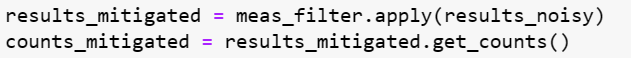

In [19]:
Sz_sim_cent_noisy = []
Sz_sim_cent_mitigated = []

for it in range(len(time_sim)):
    
    qc_noisy = QuantumCircuit(3,3)
    
    qc_noisy.h(1)
    
    qc_noisy.rz(B*time_sim[it],0)
    qc_noisy.rz(B*time_sim[it],1)
    qc_noisy.rz(B*time_sim[it],2)
        
    for itr in range(Ntr):
        
        qc_noisy.append(Heisenberg, [0,1])
        qc_noisy.append(Heisenberg, [1,2])
        
    qc_noisy.measure(range(3),range(3))
    
    t_value = (J/4)*time_sim[it]/Ntr
    qc_noisy = qc_noisy.bind_parameters([t_value])
    
    results_noisy = execute(qc_noisy, backend, basis_gates=basis_gates, noise_model=custom_noise_model, shots=Nshots).result()
    counts_noisy = results_noisy.get_counts()
    
    if not "000" in counts_noisy: counts_noisy["000"] = 0
    if not "001" in counts_noisy: counts_noisy["001"] = 0
    if not "010" in counts_noisy: counts_noisy["010"] = 0
    if not "011" in counts_noisy: counts_noisy["011"] = 0
    if not "100" in counts_noisy: counts_noisy["100"] = 0
    if not "101" in counts_noisy: counts_noisy["101"] = 0
    if not "110" in counts_noisy: counts_noisy["110"] = 0
    if not "111" in counts_noisy: counts_noisy["111"] = 0
        
    Sz_sim_cent_noisy.append(float(1/2)*((counts_noisy['000'])+(counts_noisy['001'])-(counts_noisy['010'])-(counts_noisy['011'])+(counts_noisy['100'])+(counts_noisy['101'])-(counts_noisy['110'])-(counts_noisy['111']))/Nshots)
    
    results_mitigated = meas_filter.apply(results_noisy)
    counts_mitigated = results_mitigated.get_counts()
    
    if not "000" in counts_mitigated: counts_mitigated["000"] = 0
    if not "001" in counts_mitigated: counts_mitigated["001"] = 0
    if not "010" in counts_mitigated: counts_mitigated["010"] = 0
    if not "011" in counts_mitigated: counts_mitigated["011"] = 0
    if not "100" in counts_mitigated: counts_mitigated["100"] = 0
    if not "101" in counts_mitigated: counts_mitigated["101"] = 0
    if not "110" in counts_mitigated: counts_mitigated["110"] = 0
    if not "111" in counts_mitigated: counts_mitigated["111"] = 0
        
    Sz_sim_cent_mitigated.append(float(1/2)*((counts_mitigated['000'])+(counts_mitigated['001'])-(counts_mitigated['010'])-(counts_mitigated['011'])+(counts_mitigated['100'])+(counts_mitigated['101'])-(counts_mitigated['110'])-(counts_mitigated['111']))/Nshots)

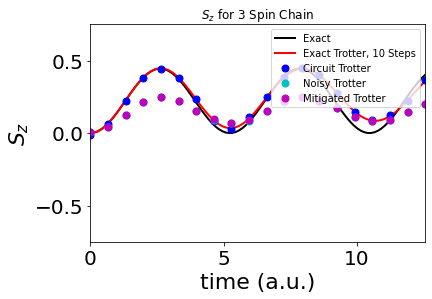

In [20]:
fig, ax = plt.subplots()

plt.title('$S_z$ for 3 Spin Chain')
plt.plot(time, Szt_cent, linewidth=2.0, color = 'k', label = 'Exact')
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels      
plt.xlabel("time (a.u.)",size=22)
plt.ylabel("$S_z$",size=22)

plt.ylim([-0.75,0.75])
plt.xlim([0,4*np.pi])

plt.plot(time, Szt_cent_Tr, linewidth=2.0, color = 'r', label = 'Exact Trotter, 10 Steps')

plt.plot(time_sim, Sz_sim_cent, color='b', lw=0, marker='o', markersize=7, label = 'Circuit Trotter')
#plt.plot(time_sim, Sz_sim_cent_real, color='g', lw=0, marker='o', markersize=7, label = 'Hardware Trotter')
plt.plot(time_sim, Sz_sim_cent_noisy, color='c', lw=0, marker='o', markersize=7, label = 'Noisy Trotter')
plt.plot(time_sim, Sz_sim_cent_mitigated, color='m', lw=0, marker='o', markersize=7, label = 'Mitigated Trotter')
plt.legend(loc='upper right')

In [21]:
Sx_sim_cent_noisy = []
Sx_sim_cent_mitigated = []

for it in range(len(time_sim)):
    
    qc_noisy = QuantumCircuit(3,3)
    
    qc_noisy.h(1)
    
    qc_noisy.rz(B*time_sim[it],0)
    qc_noisy.rz(B*time_sim[it],1)
    qc_noisy.rz(B*time_sim[it],2)
        
    for itr in range(Ntr):
        
        qc_noisy.append(Heisenberg, [0,1])
        qc_noisy.append(Heisenberg, [1,2])
      
    qc_noisy.h(1)
    qc_noisy.measure(range(3),range(3))
    
    t_value = (J/4)*time_sim[it]/Ntr
    qc_noisy = qc_noisy.bind_parameters([t_value])
    
    results_noisy = execute(qc_noisy, backend, basis_gates=basis_gates, noise_model=custom_noise_model, shots=Nshots).result()
    counts_noisy = results_noisy.get_counts()
    
    if not "000" in counts_noisy: counts_noisy["000"] = 0
    if not "001" in counts_noisy: counts_noisy["001"] = 0
    if not "010" in counts_noisy: counts_noisy["010"] = 0
    if not "011" in counts_noisy: counts_noisy["011"] = 0
    if not "100" in counts_noisy: counts_noisy["100"] = 0
    if not "101" in counts_noisy: counts_noisy["101"] = 0
    if not "110" in counts_noisy: counts_noisy["110"] = 0
    if not "111" in counts_noisy: counts_noisy["111"] = 0
        
    Sx_sim_cent_noisy.append(float(1/2)*((counts_noisy['000'])+(counts_noisy['001'])-(counts_noisy['010'])-(counts_noisy['011'])+(counts_noisy['100'])+(counts_noisy['101'])-(counts_noisy['110'])-(counts_noisy['111']))/Nshots)
    
    results_mitigated = meas_filter.apply(results_noisy)
    counts_mitigated = results_mitigated.get_counts()
    
    if not "000" in counts_mitigated: counts_mitigated["000"] = 0
    if not "001" in counts_mitigated: counts_mitigated["001"] = 0
    if not "010" in counts_mitigated: counts_mitigated["010"] = 0
    if not "011" in counts_mitigated: counts_mitigated["011"] = 0
    if not "100" in counts_mitigated: counts_mitigated["100"] = 0
    if not "101" in counts_mitigated: counts_mitigated["101"] = 0
    if not "110" in counts_mitigated: counts_mitigated["110"] = 0
    if not "111" in counts_mitigated: counts_mitigated["111"] = 0
        
    Sx_sim_cent_mitigated.append(float(1/2)*((counts_mitigated['000'])+(counts_mitigated['001'])-(counts_mitigated['010'])-(counts_mitigated['011'])+(counts_mitigated['100'])+(counts_mitigated['101'])-(counts_mitigated['110'])-(counts_mitigated['111']))/Nshots)

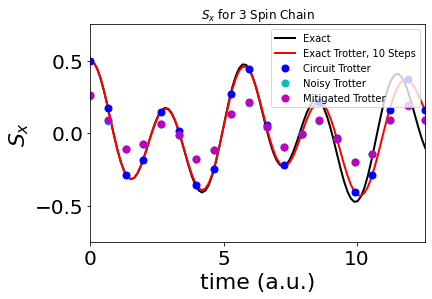

In [22]:
fig, ax = plt.subplots()

plt.title('$S_x$ for 3 Spin Chain')
plt.plot(time, Sxt_cent, linewidth=2.0, color = 'k', label = 'Exact')
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels      
plt.xlabel("time (a.u.)",size=22)
plt.ylabel("$S_x$",size=22)

plt.ylim([-0.75,0.75])
plt.xlim([0,4*np.pi])

plt.plot(time, Sxt_cent_Tr, linewidth=2.0, color = 'r', label = 'Exact Trotter, 10 Steps')

plt.plot(time_sim, Sx_sim_cent, color='b', lw=0, marker='o', markersize=7, label = 'Circuit Trotter')
#plt.plot(time_sim, Sx_sim_cent_real, color='g', lw=0, marker='o', markersize=7, label = 'Hardware Trotter')
plt.plot(time_sim, Sx_sim_cent_noisy, color='c', lw=0, marker='o', markersize=7, label = 'Noisy Trotter')
plt.plot(time_sim, Sx_sim_cent_mitigated, color='m', lw=0, marker='o', markersize=7, label = 'Mitigated Trotter')
plt.legend(loc='upper right')

In [23]:
Sy_sim_cent_noisy = []
Sy_sim_cent_mitigated = []

for it in range(len(time_sim)):
    
    qc_noisy = QuantumCircuit(3,3)
    
    qc_noisy.h(1)
    
    qc_noisy.rz(B*time_sim[it],0)
    qc_noisy.rz(B*time_sim[it],1)
    qc_noisy.rz(B*time_sim[it],2)
        
    for itr in range(Ntr):
        
        qc_noisy.append(Heisenberg, [0,1])
        qc_noisy.append(Heisenberg, [1,2])
      
    qc_noisy.sdg(1)
    qc_noisy.h(1)
    qc_noisy.measure(range(3),range(3))
    
    t_value = (J/4)*time_sim[it]/Ntr
    qc_noisy = qc_noisy.bind_parameters([t_value])
    
    results_noisy = execute(qc_noisy, backend, basis_gates=basis_gates, noise_model=custom_noise_model, shots=Nshots).result()
    counts_noisy = results_noisy.get_counts()
    
    if not "000" in counts_noisy: counts_noisy["000"] = 0
    if not "001" in counts_noisy: counts_noisy["001"] = 0
    if not "010" in counts_noisy: counts_noisy["010"] = 0
    if not "011" in counts_noisy: counts_noisy["011"] = 0
    if not "100" in counts_noisy: counts_noisy["100"] = 0
    if not "101" in counts_noisy: counts_noisy["101"] = 0
    if not "110" in counts_noisy: counts_noisy["110"] = 0
    if not "111" in counts_noisy: counts_noisy["111"] = 0
        
    Sy_sim_cent_noisy.append(float(1/2)*((counts_noisy['000'])+(counts_noisy['001'])-(counts_noisy['010'])-(counts_noisy['011'])+(counts_noisy['100'])+(counts_noisy['101'])-(counts_noisy['110'])-(counts_noisy['111']))/Nshots)
    
    results_mitigated = meas_filter.apply(results_noisy)
    counts_mitigated = results_mitigated.get_counts()
    
    if not "000" in counts_mitigated: counts_mitigated["000"] = 0
    if not "001" in counts_mitigated: counts_mitigated["001"] = 0
    if not "010" in counts_mitigated: counts_mitigated["010"] = 0
    if not "011" in counts_mitigated: counts_mitigated["011"] = 0
    if not "100" in counts_mitigated: counts_mitigated["100"] = 0
    if not "101" in counts_mitigated: counts_mitigated["101"] = 0
    if not "110" in counts_mitigated: counts_mitigated["110"] = 0
    if not "111" in counts_mitigated: counts_mitigated["111"] = 0
        
    Sy_sim_cent_mitigated.append(float(1/2)*((counts_mitigated['000'])+(counts_mitigated['001'])-(counts_mitigated['010'])-(counts_mitigated['011'])+(counts_mitigated['100'])+(counts_mitigated['101'])-(counts_mitigated['110'])-(counts_mitigated['111']))/Nshots)

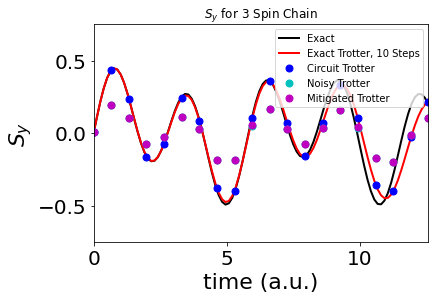

In [24]:
fig, ax = plt.subplots()

plt.title('$S_y$ for 3 Spin Chain')
plt.plot(time, Syt_cent, linewidth=2.0, color = 'k', label = 'Exact')
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels      
plt.xlabel("time (a.u.)",size=22)
plt.ylabel("$S_y$",size=22)

plt.ylim([-0.75,0.75])
plt.xlim([0,4*np.pi])

plt.plot(time, Syt_cent_Tr, linewidth=2.0, color = 'r', label = 'Exact Trotter, 10 Steps')

plt.plot(time_sim, Sy_sim_cent, color='b', lw=0, marker='o', markersize=7, label = 'Circuit Trotter')
#plt.plot(time_sim, Sy_sim_cent_real, color='g', lw=0, marker='o', markersize=7, label = 'Hardware Trotter')
plt.plot(time_sim, Sy_sim_cent_noisy, color='c', lw=0, marker='o', markersize=7, label = 'Noisy Trotter')
plt.plot(time_sim, Sy_sim_cent_mitigated, color='m', lw=0, marker='o', markersize=7, label = 'Mitigated Trotter')
plt.legend(loc='upper right')